## 3. Data modeling

In [108]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

### 3.1  linear Regression

In [109]:
lr = LinearRegression()
# Fit 'linear' to the training set
lr.fit(x_train, y_train)

# Predict the test set labels 'y_pred'
lr_y_pred_test = lr.predict(x_test)
lr_y_pred_train = lr.predict(x_train)

lr_MSE_CV_scores = -cross_val_score(
    lr, x_train, y_train, cv=10, scoring="neg_mean_squared_error", n_jobs=-1
)
# Evaluate the test set RMSE
lr_rmse_train = MSE(y_train, lr_y_pred_train) ** (1 / 2)
lr_rmse_test = MSE(y_test, lr_y_pred_test) ** (1 / 2)
lr_RMSE_CV = (lr_MSE_CV_scores.mean()) ** (1 / 2)

# Print the test set RMSE
print("Train set RMSE of rf: {:.2f}".format(lr_rmse_train))
print("Test set RMSE of rf: {:.2f}".format(lr_rmse_test))
print("CV RMSE: {:.2f}".format(lr_RMSE_CV))

Train set RMSE of rf: 1.93
Test set RMSE of rf: 1.95
CV RMSE: 1.94


In [110]:
lr.score(x_train, y_train)

0.8029651645841578

In [111]:
lr.score(x_test, y_test)

0.8005115397963668

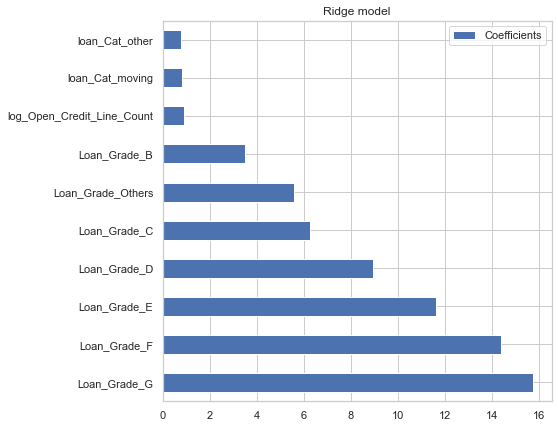

In [112]:
#feature importance
importances = pd.DataFrame(
    lr.coef_, columns=["Coefficients"], index=x_train.columns)
importances = importances.sort_values(by='Coefficients', ascending=False)[:10]

importances.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

### 3.2 Random forest

In [113]:
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.1)
# Fit 'rf' to the training set
rf.fit(x_train, y_train)

# Predict the test set labels 'y_pred'
rf_y_pred_test = rf.predict(x_test)
rf_y_pred_train = rf.predict(x_train)
rf_MSE_CV_scores = -cross_val_score(
    rf, x_train, y_train, cv=10, scoring="neg_mean_squared_error", n_jobs=-1
)
# Evaluate the test set RMSE
rf_rmse_test = MSE(y_test, rf_y_pred_test) ** (1 / 2)
rf_rmse_train = MSE(y_train, rf_y_pred_train) ** (1 / 2)
rf_RMSE_CV = (rf_MSE_CV_scores.mean()) ** (1 / 2)

# Print the test set RMSE
print("Train set RMSE of rf: {:.2f}".format(rf_rmse_train))
print("Test set RMSE of rf: {:.2f}".format(rf_rmse_test))
print("CV RMSE: {:.2f}".format(rf_RMSE_CV))

Train set RMSE of rf: 3.85
Test set RMSE of rf: 3.85
CV RMSE: 3.85


In [114]:
rf.score(x_train, y_train)

0.21887540205491063

In [115]:
rf.score(x_test, y_test)

0.22096955023741294

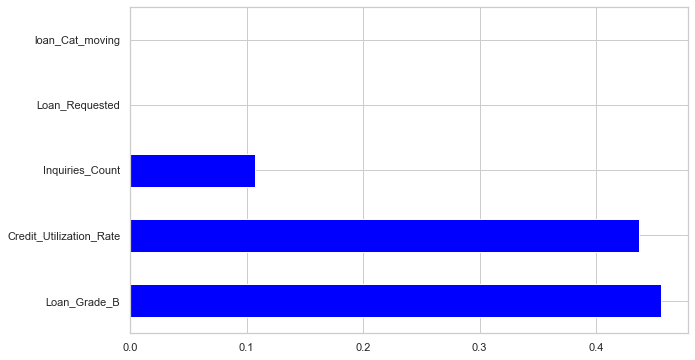

In [116]:
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values(ascending=False).head()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind="barh", color="blue")
plt.show()

### 3.3 Decision tree

In [117]:
dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=0.1, random_state=6)
# Fit dt to the training set
dt.fit(x_train, y_train)


# Predict the labels of the training set
dt_y_pred_train = dt.predict(x_train)
dt_y_pred_test = dt.predict(x_test)
dt_MSE_CV_scores = -cross_val_score(
    dt, x_train, y_train, cv=10, scoring="neg_mean_squared_error", n_jobs=-1
)

# Evaluate the training set RMSE of dt
dt_RMSE_train = (MSE(y_train, dt_y_pred_train)) ** (1 / 2)
dt_RMSE_test = (MSE(y_test, dt_y_pred_test)) ** (1 / 2)
dt_RMSE_CV = (dt_MSE_CV_scores.mean()) ** (1 / 2)

# Print RMSE score
print("Train RMSE: {:.2f}".format(dt_RMSE_train))
print("Test RMSE of dt: {:.2f}".format(dt_RMSE_test))
print("CV RMSE: {:.2f}".format(dt_RMSE_CV))

Train RMSE: 3.64
Test RMSE of dt: 3.64
CV RMSE: 3.64


In [118]:
dt.score(x_train, y_train)

0.3008469440519915

In [119]:
dt.score(x_test, y_test)

0.30341919246493654

### 3.3.1 Decision tree parameter tuning: max_depth=40, min_samples_leaf=0.05

In [120]:
dt1 = DecisionTreeRegressor(max_depth=40, min_samples_leaf=0.05, random_state=6)
# Fit dt to the training set
dt1.fit(x_train, y_train)

# Predict the labels 
dt1_y_pred_train = dt1.predict(x_train)
dt1_y_pred_test = dt1.predict(x_test)
# Compute the array containing the 10-folds CV MSEs
dt1_MSE_CV_scores = -cross_val_score(
    dt1, x_train, y_train, cv=10, scoring="neg_mean_squared_error", n_jobs=-1
)

# Evaluate the training set RMSE of dt
dt1_RMSE_train = (MSE(y_train, dt1_y_pred_train)) ** (1 / 2)
dt1_RMSE_test = (MSE(y_test, dt1_y_pred_test)) ** (1 / 2)
dt1_RMSE_CV = (dt1_MSE_CV_scores.mean()) ** (1 / 2)

# Print RMSE_train
print("Train RMSE: {:.2f}".format(dt1_RMSE_train))
print("Test RMSE of dt: {:.2f}".format(dt1_RMSE_test))
print("CV RMSE: {:.2f}".format(dt1_RMSE_CV))

Train RMSE: 2.98
Test RMSE of dt: 2.96
CV RMSE: 2.98


In [121]:
dt1.score(x_train, y_train)

0.5335649314897272

In [122]:
dt1.score(x_test, y_test)

0.539498205910132

### 3.4 GradientBoostingRegressor

In [123]:
gb = GradientBoostingRegressor(max_depth=10, n_estimators=200, random_state=2)
# Fit gb to the training set
gb.fit(x_train, y_train)

# Predict labels
gb_y_pred_train = gb.predict(x_train)
gb_y_pred_test = gb.predict(x_test)
# Compute the array containing the 10-folds CV MSEs
gb_MSE_CV_scores = -cross_val_score(
    dt1, x_train, y_train, cv=10, scoring="neg_mean_squared_error", n_jobs=-1
)


# Evaluate the RMSE of gb
gb_RMSE_train = (MSE(y_train, gb_y_pred_train)) ** (1 / 2)
gb_RMSE_test = (MSE(y_test, gb_y_pred_test)) ** (1 / 2)
# Compute the 10-folds CV RMSE
gb_RMSE_CV = (gb_MSE_CV_scores.mean()) ** (1 / 2)

# Print RMSE score
print("Train RMSE: {:.2f}".format(gb_RMSE_train))
print("Test RMSE of dt: {:.2f}".format(gb_RMSE_test))
print("CV RMSE: {:.2f}".format(gb_RMSE_CV))

Train RMSE: 1.09
Test RMSE of dt: 1.51
CV RMSE: 2.98


In [124]:
gb.score(x_train, y_train)

0.9369237979514815

In [125]:
gb.score(x_test, y_test)

0.8805048689825804

### Apply to test data
#### apply all methods use in train data, to test data


In [126]:
test = pd.read_csv('Holdout for Testing.csv')
#rename column name
test.columns = ['Interest_Rate', 'loanID', 'borID', 'Loan_Requested', 'Loan_Funded', 'Investor_portion', \
                'Number_of_Payments', 'Loan_Grade','loanSGrade','job', 'Years_Employed', 'Home_Ownership',\
                'Annual_Income', 'Verification', 'Issued_MonYY','reason_Loan', 'loan_Cat','loanTitle', 'zip_3',\
                'State', 'Debit_Payment_Ratio', 'Delinquency_Frequency','Credit_Earliest_MonYY','Inquiries_Count',\
                'Delinquency_Recency', 'Public_Record_Recency','Open_Credit_Line_Count', 'Derogatory_Public_Record_Count',\
                'Total_Credit','Credit_Utilization_Rate','Total_Credit_Line_Count','Initial_Status']

test.head(5)

,Interest_Rate,loanID,borID,Loan_Requested,Loan_Funded,Investor_portion,Number_of_Payments,Loan_Grade,loanSGrade,job,Years_Employed,Home_Ownership,Annual_Income,Verification,Issued_MonYY,reason_Loan,loan_Cat,loanTitle,zip_3,State,Debit_Payment_Ratio,Delinquency_Frequency,Credit_Earliest_MonYY,Inquiries_Count,Delinquency_Recency,Public_Record_Recency,Open_Credit_Line_Count,Derogatory_Public_Record_Count,Total_Credit,Credit_Utilization_Rate,Total_Credit_Line_Count,Initial_Status
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,10+ years,MORTGAGE,68000.0,VERIFIED - income,15-Mar,NaN,debt_consolidation,Debt consolidation,430xx,OH,28.31,0,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,8 years,RENT,110480.0,VERIFIED - income,15-Mar,NaN,debt_consolidation,Debt consolidation,945xx,CA,16.03,0,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,10+ years,MORTGAGE,86000.0,VERIFIED - income,15-Mar,NaN,debt_consolidation,Debt consolidation,195xx,PA,32.49,0,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,10+ years,RENT,30000.0,VERIFIED - income source,15-Mar,NaN,debt_consolidation,Debt consolidation,921xx,CA,32.96,0,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,10+ years,MORTGAGE,82500.0,VERIFIED - income,15-Mar,NaN,debt_consolidation,Debt consolidation,196xx,PA,31.03,0,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [127]:
#drop interest_rate in the test data
test = test.drop("Interest_Rate", axis=1)

In [128]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loanID                          80000 non-null  int64  
 1   borID                           80000 non-null  int64  
 2   Loan_Requested                  80000 non-null  object 
 3   Loan_Funded                     80000 non-null  object 
 4   Investor_portion                80000 non-null  object 
 5   Number_of_Payments              80000 non-null  object 
 6   Loan_Grade                      80000 non-null  object 
 7   loanSGrade                      80000 non-null  object 
 8   job                             75606 non-null  object 
 9   Years_Employed                  75618 non-null  object 
 10  Home_Ownership                  80000 non-null  object 
 11  Annual_Income                   80000 non-null  float64
 12  Verification                    

In [129]:
# drop variables that are not predictive to target variable
test=test.drop(columns = ['reason_Loan', 'loanTitle','Delinquency_Recency', 'Public_Record_Recency'])
test=test.drop(columns = ['loanID', 'borID','loanSGrade','zip_3'])
test=test.drop(columns = ['job'])

In [130]:
#Loan_Requested, Loan_Funded,Investor_portion
test.Loan_Requested = test.Loan_Requested.replace('[\$\,]','', regex = True).astype(int)
test.Loan_Funded = test.Loan_Funded.replace('[\$\,]','', regex = True).astype(int)
test.Investor_portion = test.Investor_portion.replace('[\$\,]','', regex = True).astype(int)

test=test.drop(['Loan_Funded','Investor_portion'],axis=1)

In [131]:
# Number_of_Payments
test['pay_36months'] = test['Number_of_Payments'].apply(lambda x: 1 if x == '36 months' else 0)
test = test.drop('Number_of_Payments', axis=1)

In [132]:
#loan grade
test["Loan_Grade"] = test["Loan_Grade"].fillna('Others').astype("category")

In [133]:
#Years_Employed
test['Years_Employed']= test['Years_Employed'].str.replace('years','').str.replace('year','').str.replace('+','')
test['Years_Employed']= test['Years_Employed'].str.replace('< 1','0')
test['Years_Employed']= test['Years_Employed'].astype('float')

test['Years_Employed']=test['Years_Employed'].interpolate()
new=['0-4','5-9','10']
test['Years_Employed']= [new[int(x)//5] if x!='Other' else 'Other' for x in test['Years_Employed']]

In [134]:
#Home_Ownership
test['Home_Ownership']=test['Home_Ownership'].str.replace('NONE','OTHER').str.replace('ANY','OTHER')
test['Home_Ownership']=test['Home_Ownership'].fillna("OTHER")
test['Home_Ownership'] = test['Home_Ownership'].astype("category")

Found that the pattern for this test data is different from the original data

In [136]:
test = test.sort_values("Credit_Earliest_MonYY").reset_index()
test["Credit_Earliest_MonYY"][30000:35000]

30000     7-Jan
30001     7-Jan
30002     7-Jan
30003     7-Jan
30004     7-Jan
30005     7-Jan
30006     7-Jan
30007     7-Jan
30008     7-Jan
30009     7-Jan
30010     7-Jan
30011     7-Jan
30012     7-Jan
30013     7-Jan
30014     7-Jan
30015     7-Jan
30016     7-Jan
30017     7-Jan
30018     7-Jan
30019     7-Jan
30020     7-Jan
30021     7-Jan
30022     7-Jan
30023     7-Jan
30024     7-Jan
30025     7-Jan
30026     7-Jan
30027     7-Jan
30028     7-Jan
30029     7-Jan
30030     7-Jan
30031     7-Jan
30032     7-Jan
30033     7-Jan
30034     7-Jan
30035     7-Jan
30036     7-Jan
30037     7-Jan
30038     7-Jan
30039     7-Jan
30040     7-Jan
30041     7-Jan
30042     7-Jan
30043     7-Jan
30044     7-Jan
30045     7-Jan
30046     7-Jan
30047     7-Jan
30048     7-Jan
30049     7-Jan
30050     7-Jan
30051     7-Jan
30052     7-Jan
30053     7-Jan
30054     7-Jan
30055     7-Jan
30056     7-Jan
30057     7-Jan
30058     7-Jan
30059     7-Jan
30060     7-Jan
30061     7-Jan
30062   

From the above, you can see that there's a difference of datatype for Credit_Earliest_MonYY.

In [137]:
# credit_earliest date
test["Credit_Earliest_MonYY"][:34017] = test["Credit_Earliest_MonYY"][:34017].apply(
    lambda x: datetime.strptime(str(x + "-22"), "%d-%b-%y"))

test["Credit_Earliest_MonYY"][34017:] = test["Credit_Earliest_MonYY"][34017:].apply(
    lambda x: datetime.strptime(str(x), "%b-%y"))

In [138]:
test['credit_earliest_month'] = pd.to_datetime(test['Credit_Earliest_MonYY']).dt.month
test['credit_earliest_year']  = pd.to_datetime(test['Credit_Earliest_MonYY']).dt.year
test['credit_earliest_year']  = test['credit_earliest_year'].apply(lambda x: str(x)[-2:]).astype("int")

In [139]:
# issued_date
test['issued_month'] = test['Issued_MonYY'].apply(lambda x: str(x)[-3:])
test['issued_year'] = test['Issued_MonYY'].apply(lambda x: str(x)[:2])

test['issued_month'] = test['issued_month'].apply(lambda x: month(x))
test['issued_year'] = test['issued_year'].apply(lambda x: year(x))
test['issued_year'] = test['issued_year'].apply(lambda x: str(x)[-2:]).astype("int")

In [140]:
test=test.drop(columns = ["Credit_Earliest_MonYY","Issued_MonYY","index"])

In [141]:
test.head()

,Loan_Requested,Loan_Grade,Years_Employed,Home_Ownership,Annual_Income,Verification,loan_Cat,State,Debit_Payment_Ratio,Delinquency_Frequency,Inquiries_Count,Open_Credit_Line_Count,Derogatory_Public_Record_Count,Total_Credit,Credit_Utilization_Rate,Total_Credit_Line_Count,Initial_Status,pay_36months,credit_earliest_month,credit_earliest_year,issued_month,issued_year
0,30000,C,10,MORTGAGE,150000.0,verified,debt_consolidation,MD,14.24,0,1,17,0,20383,87.50%,34,w,0,4,22,2,15
1,12000,A,5-9,MORTGAGE,105000.0,not verified,credit_card,HI,8.53,1,0,8,0,30372,58%,28,f,0,4,22,2,15
2,20000,B,10,MORTGAGE,85000.0,verified,debt_consolidation,MA,17.52,0,0,7,0,18035,87.50%,18,w,0,4,22,2,15
3,9000,A,10,MORTGAGE,56000.0,verified,debt_consolidation,CA,6.24,2,0,11,0,5547,55.50%,16,w,0,4,22,2,15
4,11000,B,5-9,RENT,80000.0,not verified,debt_consolidation,CA,17.16,6,0,13,0,2651,39%,33,f,0,4,22,1,15


In [142]:
test.isna().sum()

Loan_Requested                     0
Loan_Grade                         0
Years_Employed                     0
Home_Ownership                     0
Annual_Income                      0
Verification                       0
loan_Cat                           0
State                              0
Debit_Payment_Ratio                0
Delinquency_Frequency              0
Inquiries_Count                    0
Open_Credit_Line_Count             0
Derogatory_Public_Record_Count     0
Total_Credit                       0
Credit_Utilization_Rate           30
Total_Credit_Line_Count            0
Initial_Status                     0
pay_36months                       0
credit_earliest_month              0
credit_earliest_year               0
issued_month                       0
issued_year                        0
dtype: int64

In [143]:
#change State to Region
test["Region"] = test["State"].map(states)
test = test.drop("State", axis=1)

In [144]:
# change Delinquency_Frequency to has_delinquency
test['has_delinquency'] = test['Delinquency_Frequency'].apply(lambda x: 1 if x != 0 else 0)
test['has_delinquency']=test['has_delinquency'].astype("category")
test = test.drop(columns = ['Delinquency_Frequency'])

In [145]:
# change Open_Credit_Line_Count to log_Open_Credit_Line_Count
test['log_Open_Credit_Line_Count'] = np.log10(test['Open_Credit_Line_Count'])
test['log_Open_Credit_Line_Count'] .replace([-np.inf], 0, inplace = True)
test=test.drop("Open_Credit_Line_Count", axis=1)

In [146]:
#Derogatory_Public_Record_Count
test['has_derogatory'] = test['Derogatory_Public_Record_Count'].apply(lambda x: 1 if x != 0 else 0)
test['has_derogatory']=test['has_derogatory'].astype("category")
test = test.drop(columns = ['Derogatory_Public_Record_Count'])

In [147]:
# Credit_Utilization_Rate
test['Credit_Utilization_Rate'] = test['Credit_Utilization_Rate'].str.replace("%","")
test['Credit_Utilization_Rate']= pd.to_numeric(test['Credit_Utilization_Rate'])

test_mean_value=test['Credit_Utilization_Rate'].mean()
test.loc['Credit_Utilization_Rate']=test['Credit_Utilization_Rate'].fillna(value=test_mean_value, inplace=True)

In [148]:
# Total_Credit_Line_Count
#test = test[test['Total_Credit_Line_Count'] <= 53]

In [149]:
test.isna().sum()

Loan_Requested                1
Loan_Grade                    1
Years_Employed                1
Home_Ownership                1
Annual_Income                 1
Verification                  1
loan_Cat                      1
Debit_Payment_Ratio           1
Inquiries_Count               1
Total_Credit                  1
Credit_Utilization_Rate       1
Total_Credit_Line_Count       1
Initial_Status                1
pay_36months                  1
credit_earliest_month         1
credit_earliest_year          1
issued_month                  1
issued_year                   1
Region                        1
has_delinquency               1
log_Open_Credit_Line_Count    1
has_derogatory                1
dtype: int64

In [150]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80001 entries, 0 to Credit_Utilization_Rate
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Loan_Requested              80000 non-null  float64
 1   Loan_Grade                  80000 non-null  object 
 2   Years_Employed              80000 non-null  object 
 3   Home_Ownership              80000 non-null  object 
 4   Annual_Income               80000 non-null  float64
 5   Verification                80000 non-null  object 
 6   loan_Cat                    80000 non-null  object 
 7   Debit_Payment_Ratio         80000 non-null  float64
 8   Inquiries_Count             80000 non-null  float64
 9   Total_Credit                80000 non-null  float64
 10  Credit_Utilization_Rate     80000 non-null  float64
 11  Total_Credit_Line_Count     80000 non-null  float64
 12  Initial_Status              80000 non-null  object 
 13  pay_36months      

In [151]:
# Get one-hot encoding
test = pd.get_dummies(test, drop_first=True)
test.head()

,Loan_Requested,Annual_Income,Debit_Payment_Ratio,Inquiries_Count,Total_Credit,Credit_Utilization_Rate,Total_Credit_Line_Count,pay_36months,credit_earliest_month,credit_earliest_year,issued_month,issued_year,has_delinquency,log_Open_Credit_Line_Count,has_derogatory,Loan_Grade_B,Loan_Grade_C,Loan_Grade_D,Loan_Grade_E,Loan_Grade_F,Loan_Grade_G,Years_Employed_10,Years_Employed_5-9,Home_Ownership_OWN,Home_Ownership_RENT,Verification_verified,loan_Cat_credit_card,loan_Cat_debt_consolidation,loan_Cat_home_improvement,loan_Cat_house,loan_Cat_major_purchase,loan_Cat_medical,loan_Cat_moving,loan_Cat_other,loan_Cat_renewable_energy,loan_Cat_small_business,loan_Cat_vacation,loan_Cat_wedding,Initial_Status_w,Region_Northeast,Region_Other,Region_South,Region_West
0,30000.0,150000.0,14.24,1.0,20383.0,87.5,34.0,0.0,4.0,22.0,2.0,15.0,0.0,1.230449,0.0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,12000.0,105000.0,8.53,0.0,30372.0,58.0,28.0,0.0,4.0,22.0,2.0,15.0,1.0,0.903090,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,20000.0,85000.0,17.52,0.0,18035.0,87.5,18.0,0.0,4.0,22.0,2.0,15.0,0.0,0.845098,0.0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,9000.0,56000.0,6.24,0.0,5547.0,55.5,16.0,0.0,4.0,22.0,2.0,15.0,1.0,1.041393,0.0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,11000.0,80000.0,17.16,0.0,2651.0,39.0,33.0,0.0,4.0,22.0,1.0,15.0,1.0,1.113943,0.0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [152]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80001 entries, 0 to Credit_Utilization_Rate
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loan_Requested               80000 non-null  float64
 1   Annual_Income                80000 non-null  float64
 2   Debit_Payment_Ratio          80000 non-null  float64
 3   Inquiries_Count              80000 non-null  float64
 4   Total_Credit                 80000 non-null  float64
 5   Credit_Utilization_Rate      80000 non-null  float64
 6   Total_Credit_Line_Count      80000 non-null  float64
 7   pay_36months                 80000 non-null  float64
 8   credit_earliest_month        80000 non-null  float64
 9   credit_earliest_year         80000 non-null  float64
 10  issued_month                 80000 non-null  float64
 11  issued_year                  80000 non-null  float64
 12  has_delinquency              80000 non-null  float64
 13  log

In [153]:
test[test.Loan_Requested.isnull()]
test = test.dropna(subset = ['Loan_Requested'],axis =0)

In [154]:
#check the columns difference
col1 = list(test.columns)
col2 = list(df.columns)

In [155]:
for c in df.columns:
    if c not in test.columns:
        print(c)

Interest_Rate
Loan_Grade_Others
Home_Ownership_OTHER
loan_Cat_educational


In [156]:
# filling in the missing columns and fill in 0, 1 values according to the proportion in training set
test['Loan_Grade_Others'] = np.random.choice([0, 1], size=len(test), p=[0.85, 0.15])
test['Home_Ownership_OTHER'] = np.random.choice([0, 1], size=len(test), p=[0.84, 0.16])
test['loan_Cat_educational'] = np.random.choice([0, 1], size=len(test), p=[0.99, 0.01])

In [157]:
print(test.shape)
print(df.shape)

(80000, 46)
(317178, 47)


In [158]:
df.columns

Index(['Interest_Rate', 'Loan_Requested', 'Annual_Income',
       'Debit_Payment_Ratio', 'Inquiries_Count', 'Total_Credit',
       'Credit_Utilization_Rate', 'Total_Credit_Line_Count', 'pay_36months',
       'issued_month', 'issued_year', 'credit_earliest_month',
       'credit_earliest_year', 'has_delinquency', 'log_Open_Credit_Line_Count',
       'has_derogatory', 'Loan_Grade_B', 'Loan_Grade_C', 'Loan_Grade_D',
       'Loan_Grade_E', 'Loan_Grade_F', 'Loan_Grade_G', 'Loan_Grade_Others',
       'Years_Employed_10', 'Years_Employed_5-9', 'Home_Ownership_OTHER',
       'Home_Ownership_OWN', 'Home_Ownership_RENT', 'Verification_verified',
       'loan_Cat_credit_card', 'loan_Cat_debt_consolidation',
       'loan_Cat_educational', 'loan_Cat_home_improvement', 'loan_Cat_house',
       'loan_Cat_major_purchase', 'loan_Cat_medical', 'loan_Cat_moving',
       'loan_Cat_other', 'loan_Cat_renewable_energy',
       'loan_Cat_small_business', 'loan_Cat_vacation', 'loan_Cat_wedding',
       'Initia

In [159]:
test.columns

Index(['Loan_Requested', 'Annual_Income', 'Debit_Payment_Ratio',
       'Inquiries_Count', 'Total_Credit', 'Credit_Utilization_Rate',
       'Total_Credit_Line_Count', 'pay_36months', 'credit_earliest_month',
       'credit_earliest_year', 'issued_month', 'issued_year',
       'has_delinquency', 'log_Open_Credit_Line_Count', 'has_derogatory',
       'Loan_Grade_B', 'Loan_Grade_C', 'Loan_Grade_D', 'Loan_Grade_E',
       'Loan_Grade_F', 'Loan_Grade_G', 'Years_Employed_10',
       'Years_Employed_5-9', 'Home_Ownership_OWN', 'Home_Ownership_RENT',
       'Verification_verified', 'loan_Cat_credit_card',
       'loan_Cat_debt_consolidation', 'loan_Cat_home_improvement',
       'loan_Cat_house', 'loan_Cat_major_purchase', 'loan_Cat_medical',
       'loan_Cat_moving', 'loan_Cat_other', 'loan_Cat_renewable_energy',
       'loan_Cat_small_business', 'loan_Cat_vacation', 'loan_Cat_wedding',
       'Initial_Status_w', 'Region_Northeast', 'Region_Other', 'Region_South',
       'Region_West', 'Loan_

In [160]:
col=['Loan_Requested', 'Annual_Income',
       'Debit_Payment_Ratio', 'Inquiries_Count', 'Total_Credit',
       'Credit_Utilization_Rate', 'Total_Credit_Line_Count', 'pay_36months',
       'issued_month', 'issued_year', 'credit_earliest_month',
       'credit_earliest_year', 'has_delinquency', 'log_Open_Credit_Line_Count',
       'has_derogatory', 'Loan_Grade_B', 'Loan_Grade_C', 'Loan_Grade_D',
       'Loan_Grade_E', 'Loan_Grade_F', 'Loan_Grade_G', 'Loan_Grade_Others',
       'Years_Employed_10', 'Years_Employed_5-9', 'Home_Ownership_OTHER',
       'Home_Ownership_OWN', 'Home_Ownership_RENT', 'Verification_verified',
       'loan_Cat_credit_card', 'loan_Cat_debt_consolidation',
       'loan_Cat_educational', 'loan_Cat_home_improvement', 'loan_Cat_house',
       'loan_Cat_major_purchase', 'loan_Cat_medical', 'loan_Cat_moving',
       'loan_Cat_other', 'loan_Cat_renewable_energy',
       'loan_Cat_small_business', 'loan_Cat_vacation', 'loan_Cat_wedding',
       'Initial_Status_w', 'Region_Northeast', 'Region_Other', 'Region_South',
       'Region_West']

In [161]:
test = test[col]

### Apply linear model

In [162]:
test_pred = lr.predict(test)

test = pd.read_csv("Holdout for Testing.csv")
predict = pd.DataFrame(
    {"Loan_Id": test["X2"], "Predicted_Interest_Rate": test_pred}
)

In [163]:
# "Titanic Results from" *insert your name or UChicago net ID.
predict.to_csv("Loan_Results_YichinTzou.csv", index=False)

#### Summary

From the above 4 machine learning models, we choose Linear regression model, since it performed without underfitting/overfitting problem, and has lowest RMSE comparing other 3 models.
Yet, Since the linear regression has low RMSE=1.82, meaning that there's still a lot of progress can be done in the future,such as doing more work on parameter tuning. From the GB testing, we can know that there's underfitting situation, since the TRAIN RMSE~CV RMSE>TEST RMSE, which we will also work on in the furture. Also another big learning, always check the testing data you're handling, there might be other thing that you didn't handle in the previous step of cleaning.

Things I learned:
1. Start with exploratory data analysis, and check the missing value first
2. Check the test data's outcome, since it might not be the same as training data.